<center>
<h1>
<b> HEART DISEASE DIAGNOSTICS ANALYSIS </b>
</h1>
</center>

<h3>
<center>
Domain: Healthcare <br>
Dataset Source: Unified Mentor <br>
<i>Author: Bunty Patil <br>
</center>
</h3>

## Problem Statement
Health is real wealth in the pandemic time we all realized the brute effects of COVID-19 on all irrespective of status. You are required to analyze this health and medical data for better future preparation.

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings("ignore")

### Importing dataset

In [3]:
# Importing dataset usind pandas
heart_df = pd.read_csv('Heart_Disease_data.csv')

## Data Exploration

In [4]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
heart_df.shape

(1025, 14)

Dataset contains `1025 rows` and `14 columns`.

In [6]:
# Checking data types of each column
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
# Counting null values
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The dataset does not contain null values.

In [8]:
# info() method allows us to print information or summary of our data
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
# print frequency of categories
for col in heart_df:
    print(heart_df[col].value_counts(), '\n')

age
58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: count, dtype: int64 

sex
1    713
0    312
Name: count, dtype: int64 

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64 

trestbps
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
126     10
180     10
142      9
115      9
105      9
146      8
148      7
178      7
94       7
144      6
102      6
154      4
117      4
165      4
200      4
114      4
123      4
192      3
106      3
104      3
129      3


 ## Data Cleaning

The dataset contains duplicates, inconsistent column names, and values that need to be cleaned for smooth analysis.

In [10]:
heart_df.duplicated().sum()

723

In [11]:
heart_df = heart_df.drop_duplicates()

In [12]:
heart_df.shape

(302, 14)

Now, the dataset contains `302 rows` and `14 columns` after removing duplicates.

Finding `Correlation` between variables before converting the numerical values to categorical values

In [13]:
heart_df_corr = heart_df.corr()
heart_df_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


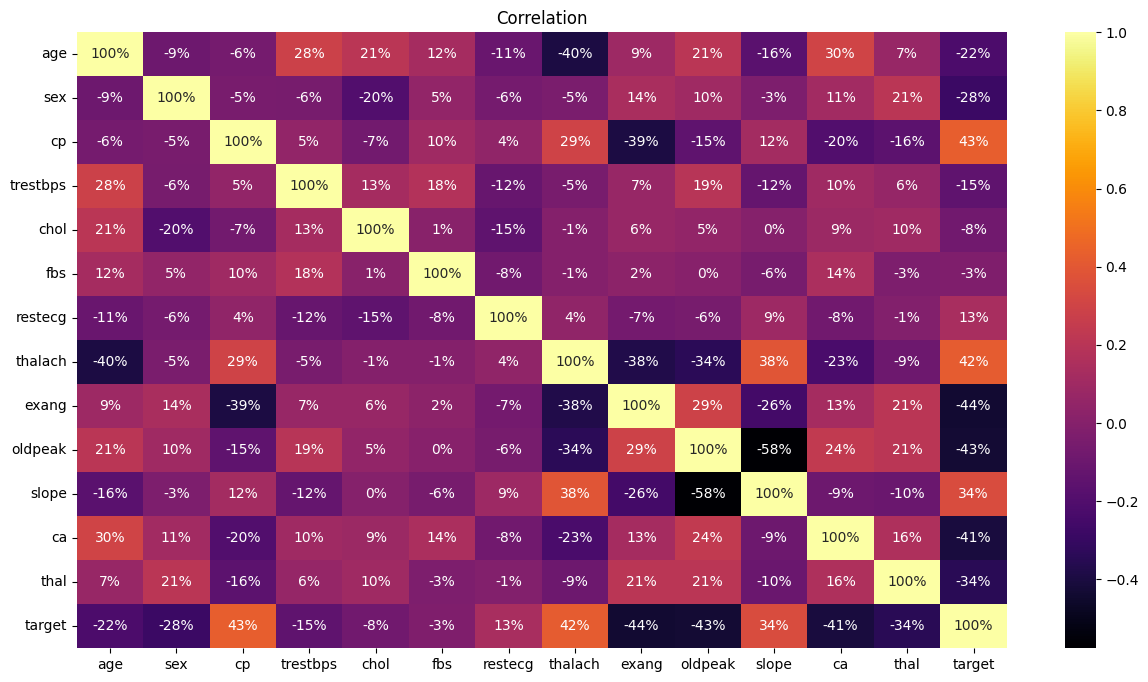

In [14]:
plt.figure(figsize=(15,8))
plt.title('Correlation')
sns.heatmap(heart_df_corr,
           annot=True,
           fmt='.0%',
           cmap='inferno');

In [15]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
# Cleaning column names
heart_df.rename(columns = {'cp': 'chest_pain', 'trestbps': 'resting_bp', 'chol': 'cholesterol',
                          'fbs': 'fasting_blood_sugar', 'restecg': 'resting_ecg', 'thalach': 'max_heartrate',
                          'exang': 'exercise_induced_angina', 'ca': 'num_vessels_colored', 'thal': 'thalassemia', 
                          'target': 'heart_disease'}, inplace=True)

In [17]:
# Modifying values 
heart_df['sex'] = heart_df['sex'].replace({1:'Male', 0:'Female'})
heart_df['chest_pain'] = heart_df['chest_pain'].replace({0: 'Typical Angina', 1: 'Atypical Angina', 
                                                        2: 'Non-Anginal', 3: 'Asymptomatic Ischemia'})
heart_df['fasting_blood_sugar'] = heart_df['fasting_blood_sugar'].replace({0:'Normal', 1: 'Abnormal'})
heart_df['resting_ecg'] = heart_df['resting_ecg'].replace({0: 'Normal', 1: 'Abnormal', 2: 'Diagnosed'})
heart_df['exercise_induced_angina'] = heart_df['exercise_induced_angina'].replace({0: 'No', 1: 'Yes'})
heart_df['slope'] = heart_df['slope'].replace({0: 'Unsloping', 1: 'Flat', 2: 'Downsloping'})
heart_df['thalassemia'] = heart_df['thalassemia'].replace({0: 'Normal', 1: 'Fixed defect', 2: 'Reversible defect',
                                                          3: 'Extensive defect'})
heart_df['heart_disease'] = heart_df['heart_disease'].replace({0: 'No', 1: 'Yes'})
heart_df.head(10)

,age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heartrate,exercise_induced_angina,oldpeak,slope,num_vessels_colored,thalassemia,heart_disease
0,52,Male,Typical Angina,125,212,Normal,Abnormal,168,No,1.0,Downsloping,2,Extensive defect,No
1,53,Male,Typical Angina,140,203,Abnormal,Normal,155,Yes,3.1,Unsloping,0,Extensive defect,No
2,70,Male,Typical Angina,145,174,Normal,Abnormal,125,Yes,2.6,Unsloping,0,Extensive defect,No
3,61,Male,Typical Angina,148,203,Normal,Abnormal,161,No,0.0,Downsloping,1,Extensive defect,No
4,62,Female,Typical Angina,138,294,Abnormal,Abnormal,106,No,1.9,Flat,3,Reversible defect,No
5,58,Female,Typical Angina,100,248,Normal,Normal,122,No,1.0,Flat,0,Reversible defect,Yes
6,58,Male,Typical Angina,114,318,Normal,Diagnosed,140,No,4.4,Unsloping,3,Fixed defect,No
7,55,Male,Typical Angina,160,289,Normal,Normal,145,Yes,0.8,Flat,1,Extensive defect,No
8,46,Male,Typical Angina,120,249,Normal,Normal,144,No,0.8,Downsloping,0,Extensive defect,No
9,54,Male,Typical Angina,122,286,Normal,Normal,116,Yes,3.2,Flat,2,Reversible defect,No


As the values in the columns were updated, the data types were also modified.

In [18]:
heart_df.dtypes

age                          int64
sex                         object
chest_pain                  object
resting_bp                   int64
cholesterol                  int64
fasting_blood_sugar         object
resting_ecg                 object
max_heartrate                int64
exercise_induced_angina     object
oldpeak                    float64
slope                       object
num_vessels_colored          int64
thalassemia                 object
heart_disease               object
dtype: object

## Data Analysis

In [19]:
# Setting default styling to all charts
sns.set_style('darkgrid')
plt.rc('axes', titlesize=16)
plt.rcParams.update({'font.size': 12})

In [20]:
### Descriptive Statistics of numerical data
heart_df.describe()

,age,resting_bp,cholesterol,max_heartrate,oldpeak,num_vessels_colored
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.718543
std,9.04797,17.563394,51.753489,22.903527,1.161452,1.006748
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,0.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,4.000000


In [21]:
# Descriptive Statistics of categorical data
heart_df.describe(include=object).transpose()

,count,unique,top,freq
sex,302,2,Male,206
chest_pain,302,4,Typical Angina,143
fasting_blood_sugar,302,2,Normal,257
resting_ecg,302,3,Abnormal,151
exercise_induced_angina,302,2,No,203
slope,302,3,Downsloping,141
thalassemia,302,4,Reversible defect,165
heart_disease,302,2,Yes,164


### `Categorical Variables Distribution`

In [22]:
# Value counts of the categorical variable or column with object data types
df_cat = heart_df.select_dtypes(include=object)

for i in df_cat:
    print(f"Value counts for column {i}: \n{df_cat[i].value_counts()}\n")

Value counts for column sex: 
sex
Male      206
Female     96
Name: count, dtype: int64

Value counts for column chest_pain: 
chest_pain
Typical Angina           143
Non-Anginal               86
Atypical Angina           50
Asymptomatic Ischemia     23
Name: count, dtype: int64

Value counts for column fasting_blood_sugar: 
fasting_blood_sugar
Normal      257
Abnormal     45
Name: count, dtype: int64

Value counts for column resting_ecg: 
resting_ecg
Abnormal     151
Normal       147
Diagnosed      4
Name: count, dtype: int64

Value counts for column exercise_induced_angina: 
exercise_induced_angina
No     203
Yes     99
Name: count, dtype: int64

Value counts for column slope: 
slope
Downsloping    141
Flat           140
Unsloping       21
Name: count, dtype: int64

Value counts for column thalassemia: 
thalassemia
Reversible defect    165
Extensive defect     117
Fixed defect          18
Normal                 2
Name: count, dtype: int64

Value counts for column heart_disease: 
heart

In [23]:
# Set up the subplot grid
#num_cols = len(df_cat.columns)
#fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 15))

# If there's only one subplot, axes is not a list, so we need to handle this case
# axes = axes.flatten()

# Loop through each column in the categorical DataFrame
# for ax, column in zip(axes, df_cat.columns):
    # Get value counts
    #value_counts = df_cat[column].value_counts()
    # Plot pie chart
    #value_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90, legend=False)
    # ax.set_ylabel('')
    # ax.set_title(f'{column} distribution')

# Adjust layout to prevent overlap
#plt.tight_layout()
#plt.show()

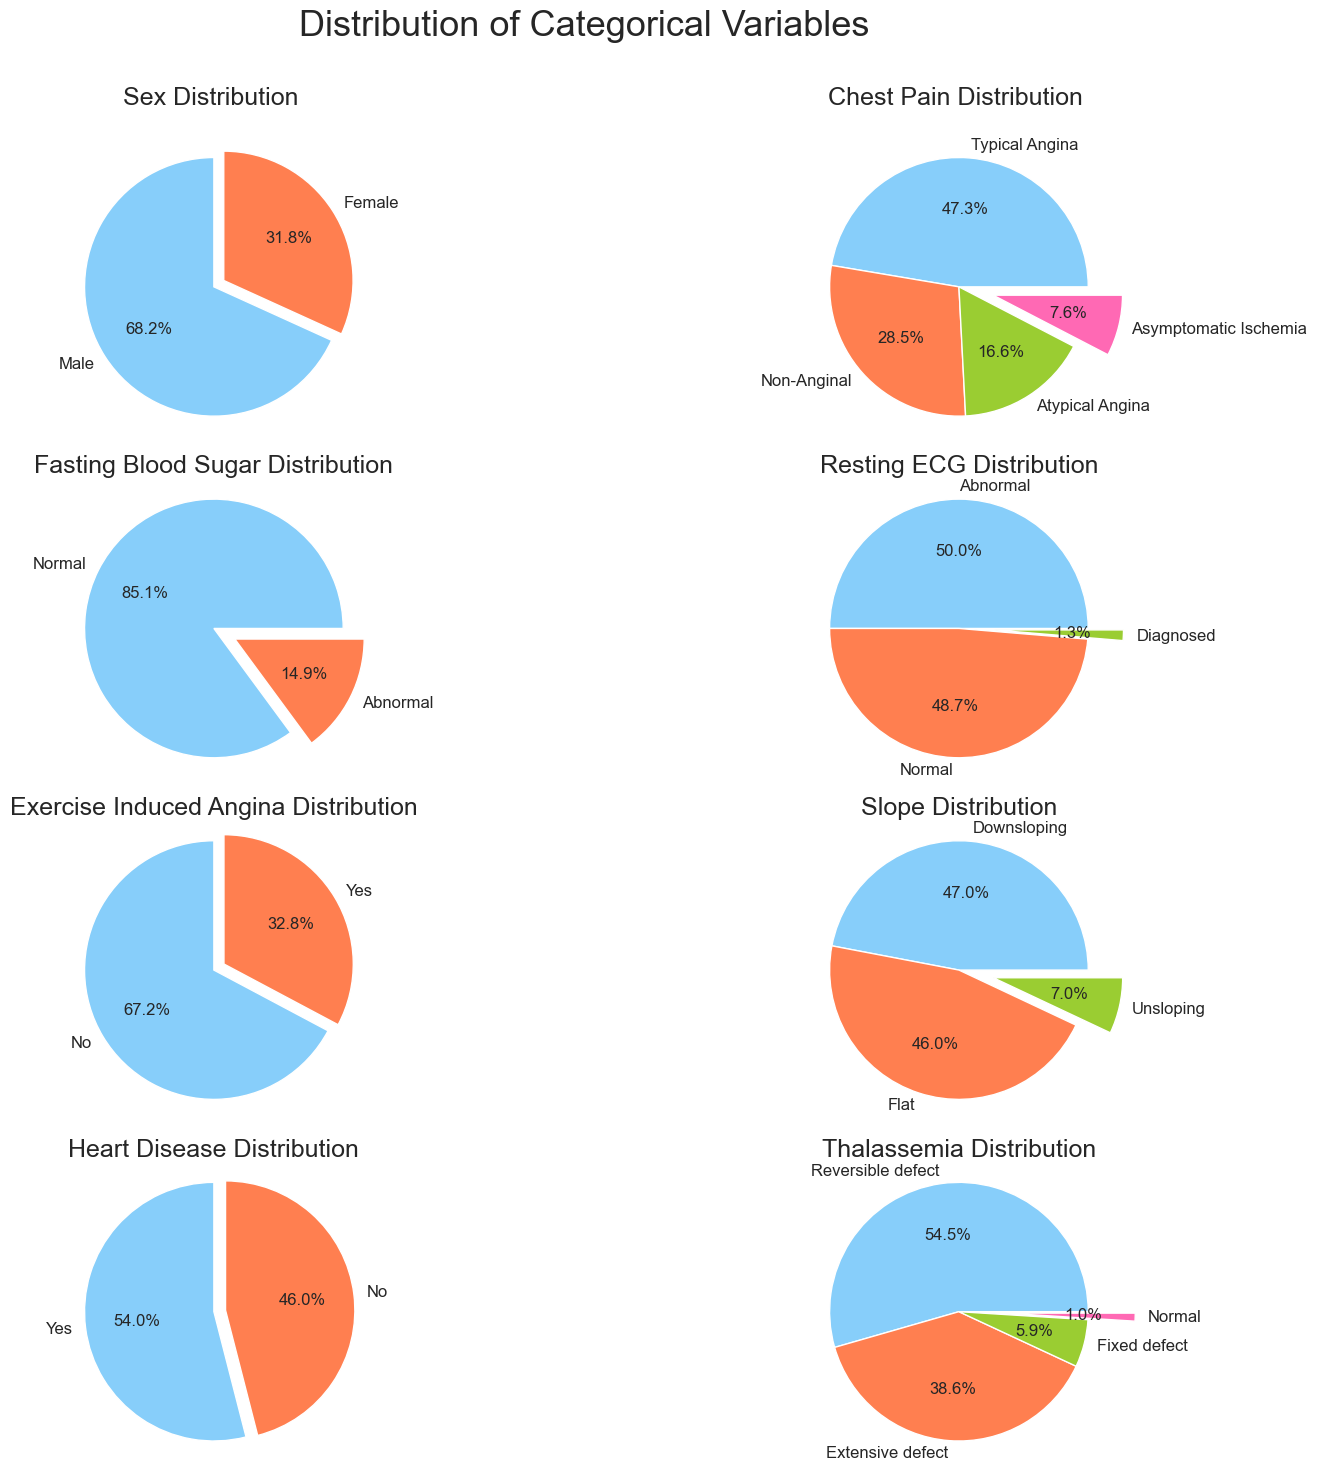

In [24]:
# Visualization of categorical variables

fig, axes = plt.subplots(4, 2, figsize=(18, 15))
fig.suptitle('Distribution of Categorical Variables \n', fontsize=26);

colors = ['lightskyblue', 'coral', 'yellowgreen', 'hotpink'];

# Sex Distribution
sex_dist = round(df_cat.sex.value_counts(normalize=True)*100, 2)
axes[0, 0].pie(sex_dist, labels=sex_dist.index, autopct='%1.1f%%', radius=1.1, explode=(0, 0.1), startangle=90, colors=colors)
axes[0, 0].set_title('Sex Distribution \n', fontsize=18);

# Chest Pain Distribution
chest_pain_dist = round(df_cat.chest_pain.value_counts(normalize=True)*100, 2)
axes[0, 1].pie(chest_pain_dist, labels=chest_pain_dist.index, autopct='%1.1f%%', radius=1.1, explode=(0,0,0,0.3), colors=colors)
axes[0, 1].set_title('Chest Pain Distribution \n', fontsize=18);

# FBS Distribution
fbs_dist = round(df_cat.fasting_blood_sugar.value_counts(normalize=True)*100,2)
axes[1, 0].pie(fbs_dist, labels=fbs_dist.index, autopct='%1.1f%%', radius=1.1, explode=(0, 0.2), colors=colors)
axes[1, 0].set_title('Fasting Blood Sugar Distribution', fontsize=18);

# ECG Distribution
ecg_dist = round(df_cat.resting_ecg.value_counts(normalize=True)*100, 2)
axes[1, 1].pie(ecg_dist, labels=ecg_dist.index, autopct='%1.1f%%', radius=1.1, explode=(0, 0, 0.3), colors=colors)
axes[1, 1].set_title('Resting ECG Distribution', fontsize=18);

# Exercise induced angina Distribution
exercise_induced_angina_dist = round(df_cat.exercise_induced_angina.value_counts(normalize=True)*100, 2)
axes[2, 0].pie(exercise_induced_angina_dist, labels=exercise_induced_angina_dist.index, autopct='%1.1f%%', radius=1.1, explode=(0,0.1), startangle=90, colors=colors)
axes[2, 0].set_title('Exercise Induced Angina Distribution', fontsize=18);

# Slope Distribution
slope_dist = round(df_cat.slope.value_counts(normalize=True), 2)
axes[2, 1].pie(slope_dist, labels=slope_dist.index, autopct='%1.1f%%', radius=1.1, explode=(0, 0, 0.3), colors=colors)
axes[2, 1].set_title('Slope Distribution', fontsize=18);

# Heart Disease Distribution
heart_disease_dist = round(df_cat.heart_disease.value_counts(normalize=True), 2)
axes[3, 0].pie(heart_disease_dist, labels=heart_disease_dist.index, autopct='%1.1f%%', radius=1.1, explode=(0, 0.1), startangle=90, colors=colors)
axes[3, 0].set_title('Heart Disease Distribution', fontsize=18);

# Thalassemia Distribution
thalassemia_dist = round(df_cat.thalassemia.value_counts(normalize=True), 2)
axes[3, 1].pie(thalassemia_dist, labels=thalassemia_dist.index, autopct='%1.1f%%', radius=1.1, explode=(0, 0, 0, 0.4), colors=colors)
axes[3, 1].set_title('Thalassemia Distribution', fontsize=18);

plt.tight_layout()

**Sex Distribution** <br>
`Distribution`: Approximately 68.2% of the participants are male and 31.8% are female. <br>
`Insight`: The dataset has a higher proportion of male participants compared to female participants, which is common in heart disease studies as men are often more affected.

**Chest Pain Distribution** <br>
`Distribution`: <br>
Typical Angina: 47.3% <br>
Non-Anginal: 28.5% <br>
Atypical Angina: 16.6% <br>
Asymptomatic Ischemia: 7.6% <br>
`Insight`: The most common type of chest pain reported is typical angina, followed by non-anginal pain. Asymptomatic ischemia is the least common.

**Fasting Blood Sugar Distribution** <br>
`Distribution`: <br>
Normal: 85.1% <br>
Abnormal (≥ 120 mg/dL): 14.9% <br>
`Insight`: The majority of participants have normal fasting blood sugar levels, while a smaller proportion has elevated fasting blood sugar, indicating potential diabetes or pre-diabetes.

**Resting ECG Distribution** <br>
`Distribution`: <br>
Normal: 48.7% <br>
Abnormal: 50.0% <br>
Diagnosed: 1.3% <br>
`Insight`: Resting ECG results are almost evenly split between normal and abnormal, with a very small percentage having a diagnosed ECG condition.

**Exercise-induced Angina Distribution** <br>
`Distribution`: <br>
No: 67.2% <br>
Yes: 32.8% <br>
`Insight`: Most participants do not experience angina induced by exercise, but about a third do, which could indicate underlying heart issues.

**Slope Distribution** <br>
`Distribution`: <br>
Flat: 46.0% <br>
Downsloping: 47.0% <br>
Upsloping: 7.0% <br>
`Insight`: The distribution of the slope of the peak exercise ST segment shows nearly equal proportions of flat and downsloping slopes, with a small percentage having an upsloping slope. Downsloping and flat slopes can be indicative of ischemia.

**Heart Disease Distribution** <br>
`Distribution`: <br>
Yes: 54.0% <br>
No: 46.0% <br>
`Insight`: Slightly more than half of the participants have heart disease, indicating a high prevalence of heart disease in the study population.

**Thalassemia Distribution** <br>
`Distribution`: <br>
Normal: 1.0% <br>
Fixed defect: 5.9% <br>
Reversible defect: 54.5% <br>
Extensive defect: 38.6% <br>
`Insight`: The majority of participants have either a reversible or extensive defect, with very few having normal or fixed defects. Reversible defects are the most common, indicating the presence of thalassemia-related issues.

### Overall Insights
- Sex Distribution: There is a significant gender disparity with more males, which aligns with the higher incidence of heart disease in men.
- Chest Pain: Typical angina is the most reported type of chest pain, suggesting many participants experience classic symptoms of heart disease.
- Fasting Blood Sugar: A significant minority has elevated fasting blood sugar, a risk factor for heart disease.
Resting ECG: Abnormal ECG results are slightly more common, indicating prevalent cardiac issues.
- Exercise Induced Angina: About one-third experience exercise-induced angina, which is a significant indicator of heart problems.
- Slope: The presence of flat and downsloping ST segments during exercise is common, both of which can suggest ischemia.
- Heart Disease: High prevalence of heart disease in the population studied, highlighting the importance of the dataset.
- Thalassemia: A large proportion of participants have significant thalassemia defects, which could complicate their cardiac condition.

### `Numerical Variables Distribution`

In [25]:
# Value counts of numerical variables or int data types
df_num = heart_df.select_dtypes(include=int)

# Iterating over all values
for col in df_num:
    print(f"Value counts for column {col}: \n{df_num[col].value_counts()}\n")

Value counts for column age: 
age
58    19
57    17
54    16
59    14
52    13
51    12
44    11
60    11
56    11
62    11
41    10
64    10
67     9
63     9
42     8
43     8
65     8
53     8
61     8
45     8
55     8
50     7
46     7
66     7
48     7
49     5
47     5
68     4
70     4
35     4
39     4
69     3
40     3
71     3
37     2
38     2
34     2
76     1
29     1
77     1
74     1
Name: count, dtype: int64

Value counts for column resting_bp: 
resting_bp
120    37
130    36
140    32
110    19
150    17
138    12
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
152     5
134     5
145     5
122     4
100     4
170     4
115     3
136     3
180     3
126     3
142     3
105     3
144     2
102     2
94      2
146     2
178     2
148     2
174     1
165     1
156     1
164     1
172     1
155     1
114     1
200     1
154     1
106     1
104     1
192     1
129     1
117     1
123     1
101     1
Name: count, dtype: int64

Value

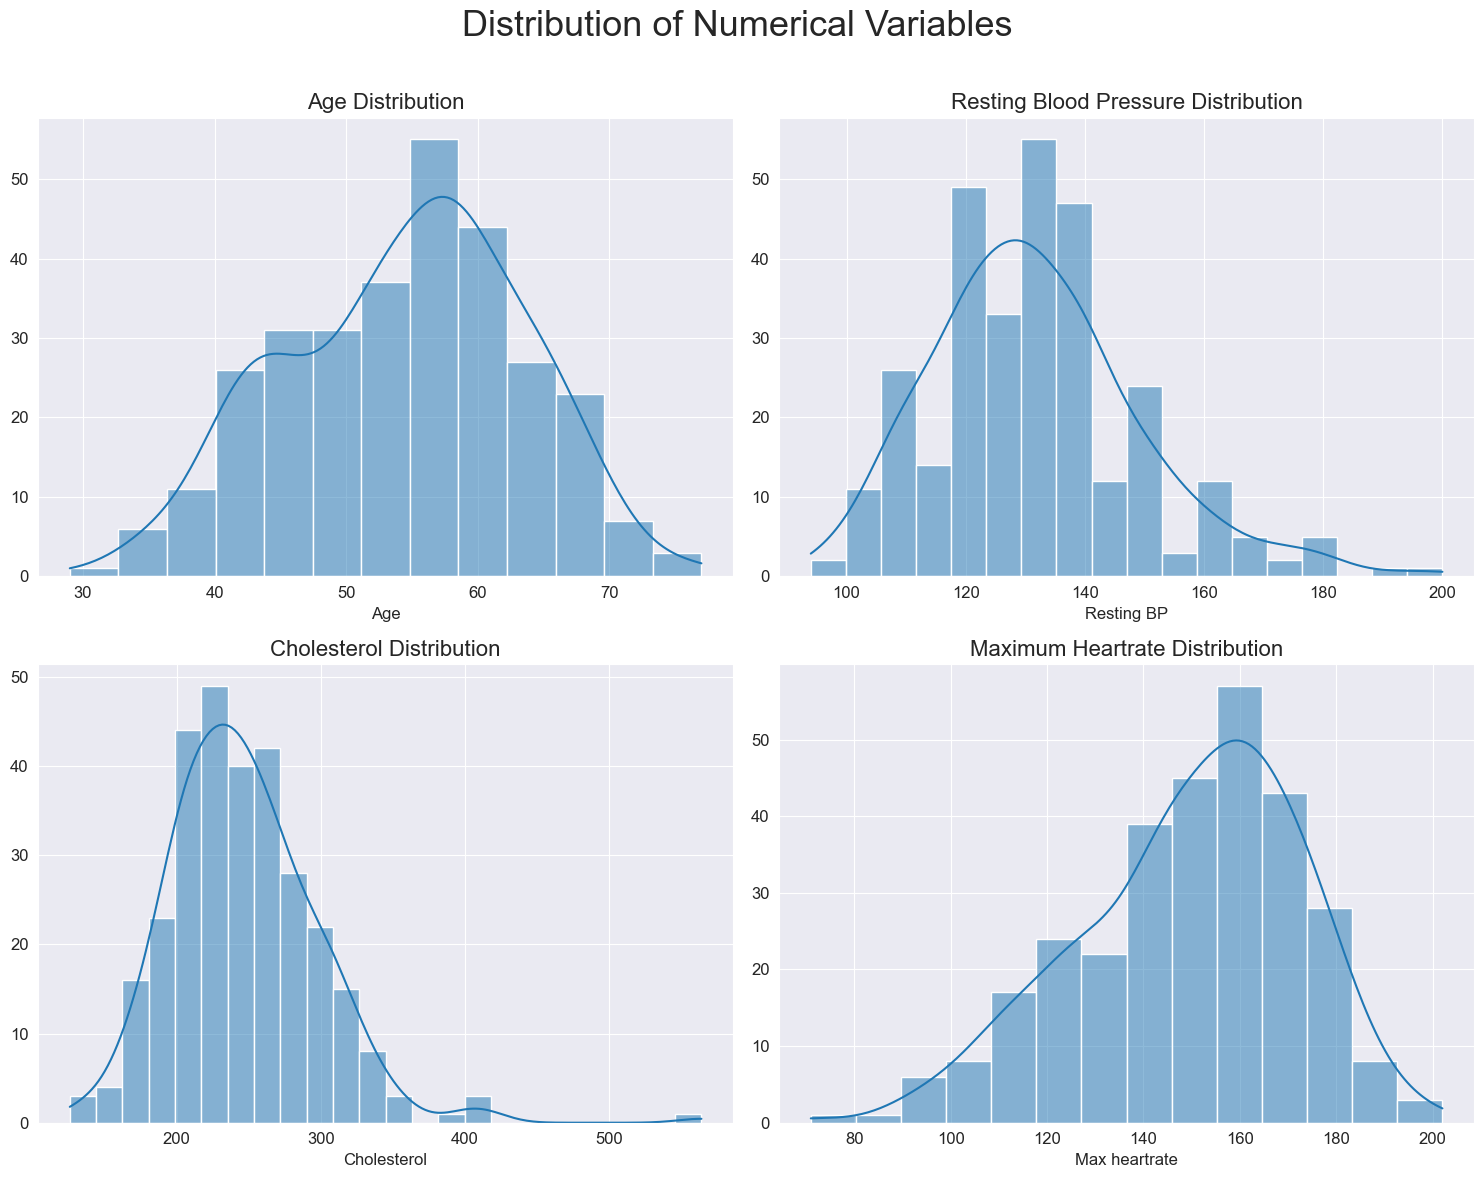

In [26]:
# Visualization of Numerical variables Distribution

fig, axes = plt.subplots(2, 2, figsize=(15,12))
fig.suptitle('Distribution of Numerical Variables \n', fontsize=26);


# Age Distribution
sns.histplot(x='age', data=heart_df, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('');

# Resting Blood Pressure Distribution
sns.histplot(x='resting_bp', data=heart_df, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Resting Blood Pressure Distribution')
axes[0, 1].set_xlabel('Resting BP')
axes[0, 1].set_ylabel('');

# Cholesterol Distribution
sns.histplot(x='cholesterol', data=heart_df, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Cholesterol Distribution')
axes[1, 0].set_xlabel('Cholesterol')
axes[1, 0].set_ylabel('');

# Maximum Heartrate Distribution
sns.histplot(x='max_heartrate', data=heart_df, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Maximum Heartrate Distribution')
axes[1, 1].set_xlabel('Max heartrate')
axes[1, 1].set_ylabel('');

plt.tight_layout()

**Age Distribution**<br>
`Shape`: The age distribution appears to be roughly normal (bell-shaped) with a slight skew to the right.<br>
`Central Tendency`: The peak of the distribution (mode) is around 55 years old.<br>
`Spread`: The ages range from about 30 to 75, with most individuals falling between 40 and 70 years old.<br>
`Outliers`: There are no significant outliers in the age distribution.<br>

**Resting Blood Pressure Distribution**<br>
`Shape`: The distribution of resting blood pressure is approximately normal, though slightly skewed to the right.<br>
`Central Tendency`: The mode is around 130 mmHg.<br>
`Spread`: Most resting blood pressures fall between 100 and 160 mmHg.<br>
`Outliers`: There are some higher values that can be considered outliers (greater than 170 mmHg).<br>

**Cholesterol Distribution**<br>
`Shape`: The cholesterol distribution is skewed to the right.<br>
`Central Tendency`: The mode is around 210 mg/dL.<br>
`Spread`: Cholesterol levels range widely from about 125 to over 400 mg/dL, with most values between 150 and 300 mg/dL.<br>
`Outliers`: There are noticeable outliers at higher cholesterol levels (greater than 400 mg/dL).<br>

**Maximum Heart Rate Distribution**<br>
`Shape`: The distribution of maximum heart rate is roughly normal, with a slight skew to the left.<br>
`Central Tendency`: The mode is around 160 beats per minute (bpm).<br>
`Spread`: Maximum heart rates range from about 80 to 200 bpm, with most values between 120 and 180 bpm.<br>
`Outliers`: Lower heart rate values (less than 100 bpm) could be considered outliers.<br>

### Overall Insights
- Age: The age distribution suggests that the majority of the study population is middle-aged to elderly, which is typical for studies related to heart disease.
- Resting Blood Pressure: The resting blood pressure values are mostly within the range considered normal to high-normal, with a few individuals having significantly higher values, indicating potential hypertension.
- Cholesterol: The cholesterol distribution shows a wide range of values, with many individuals having elevated cholesterol levels, which is a risk factor for heart disease.
- Maximum Heart Rate: The distribution of maximum heart rate suggests a healthy response to exercise or stress for most individuals, though some have lower maximum heart rates which could indicate cardiac issues.

## Age vs Heart Disease

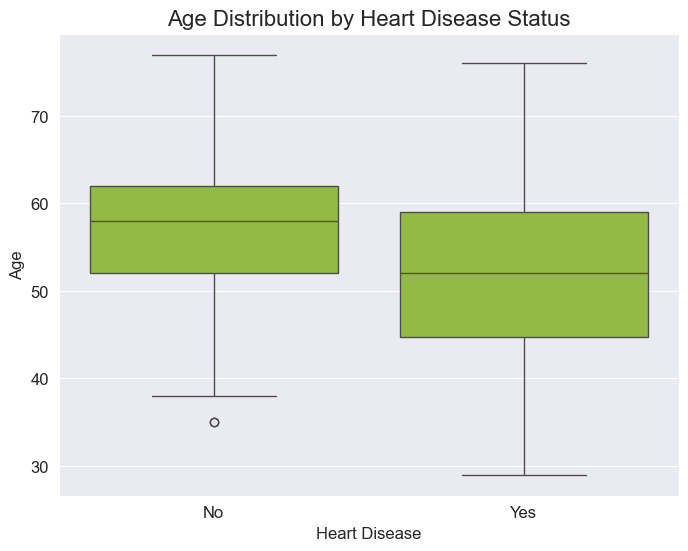

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(x='heart_disease', 
            y='age', 
            data=heart_df,
           color='yellowgreen')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Age');

`Insights from the graph:`

**Age Range**
- The Age range of individuals without heart disease is around 35-77.
- The Age range of individuals with heart disease is around 27-75.
- The ranges are fairly similar, but there is a slightly wider range for individuals with heart disease, especially on the lower side of the age range.

**Median Age**
- The median age for individuals without heart disease is approximately 57.
- The median age for individuals with heart disease is approximately 52.
- This indicates that those without heart disease tend to be older on average compared to those without heart disease.

**Inter Quartile Range (IQR)**
- The IQR for individuals without heart disease is spread between 52-62.
- The IQR for individuals with heart disease is spread between 45-60.
- This suggests that the middle 50% of ages with heart disease is more spread out compared to those without heart disease.

**Outliers**
- There is a potential outlier in the age distribution of those without heart disease around the age of 35.
- No significant outlier in the age distribution of those with heart disease.

### Sex vs Heart Disease

In [28]:
sex_hd_dist = pd.crosstab(heart_df['sex'], heart_df['heart_disease'])
sex_hd_dist

heart_disease,No,Yes
sex,,
Female,24,72
Male,114,92


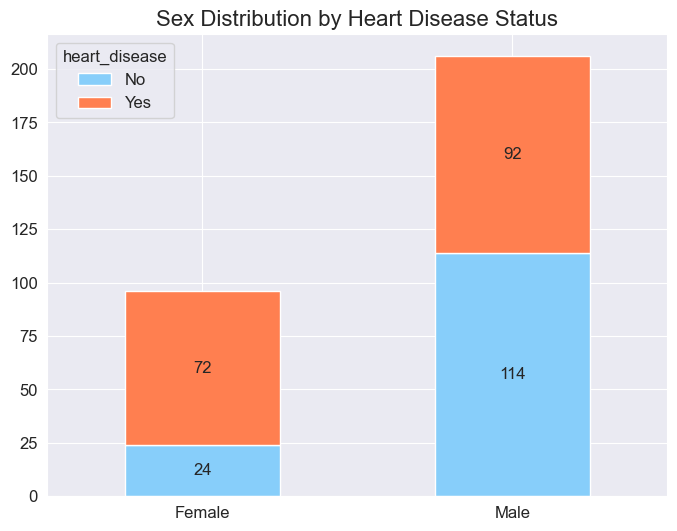

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
sex_hd_dist.plot(kind='bar', stacked=True, color=colors, ax=ax)
plt.title('Sex Distribution by Heart Disease Status')
plt.xlabel('');
plt.xticks(rotation=0);

# Data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

#### Here are the Insights from the graph:

**Overall Distribution**
- The total number of Males(206) is higher than the total number of Females(96).
- This imbalance in the dataset should be considered while interpreting the results.

**Heart Disease Status** 

`Among Females`
- 24 are without heart disease
- 72 are with heart disease
  
`Among Males`
- 114 are without heart disease
- 92 are with heart disease

**Proportion of Dataset**
- Out of all females, 75% have heart disease, and 25% do not.
- In males, around 45% have heart disease and 55% do not.

- This shows that the proportion of females with heart disease is significantly higher.
- In this specific dataset, heart disease is more prevalent among Females.

### Chest Pain vs Heart Disease

In [30]:
chest_hd_dist = pd.crosstab(heart_df.chest_pain, heart_df.heart_disease)
chest_hd_dist

heart_disease,No,Yes
chest_pain,,
Asymptomatic Ischemia,7,16
Atypical Angina,9,41
Non-Anginal,18,68
Typical Angina,104,39


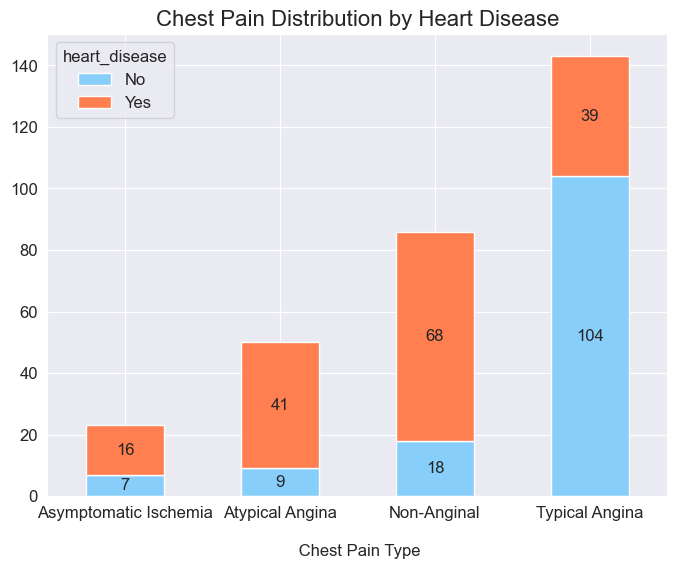

In [31]:
fig,ax = plt.subplots(figsize=(8, 6))
chest_hd_dist.plot(kind='bar', stacked=True, color=colors, ax=ax)
plt.title('Chest Pain Distribution by Heart Disease')
plt.xlabel('\n Chest Pain Type')
plt.xticks(rotation=0);

# Data Labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

#### Type of chest pain

1. `Typical Angina`: Also known as stable angina, it is characterized by chest pain or discomfort that usually occurs with activity or stress. The pain is typically described as pressure, squeezing, or fullness in the chest and may radiate to the shoulders, arms, neck, jaw, or back.
2. `Non-Anginal`: Chest pain that is not related to angina or ischemia. It may be due to other causes such as gastrointestinal issues, musculoskeletal problems, or psychological factors.
3. `Atypical Angina`: Chest pain that does not meet all the typical characteristics of angina. It may vary in location, duration, and intensity. The pain might not be triggered by physical exertion or stress and might not be relieved by rest or nitroglycerin.
4. `Asymptomatic Ischemia`: A condition where there is evidence of ischemia (reduced blood flow to the heart muscle) without the typical symptoms of chest pain. This is often detected through stress tests or other diagnostic procedures.

#### Insights

- A significant number of individuals (68) with heart disease report non-anginal chest pain. This suggests that chest pain not typically associated with angina can still be indicative of underlying heart conditions.
- Typical angina remains a strong indicator of heart disease, but its prevalence is lower compared to non-anginal chest pain in this dataset.
- Atypical angina is also relatively common among those with heart disease, underscoring the need to consider various types of chest pain when diagnosing heart conditions.
- Although less common, asymptomatic ischemia is still present in the dataset, indicating that some individuals with heart disease may not experience typical chest pain symptoms.

### Cholesterol vs Heart Disease

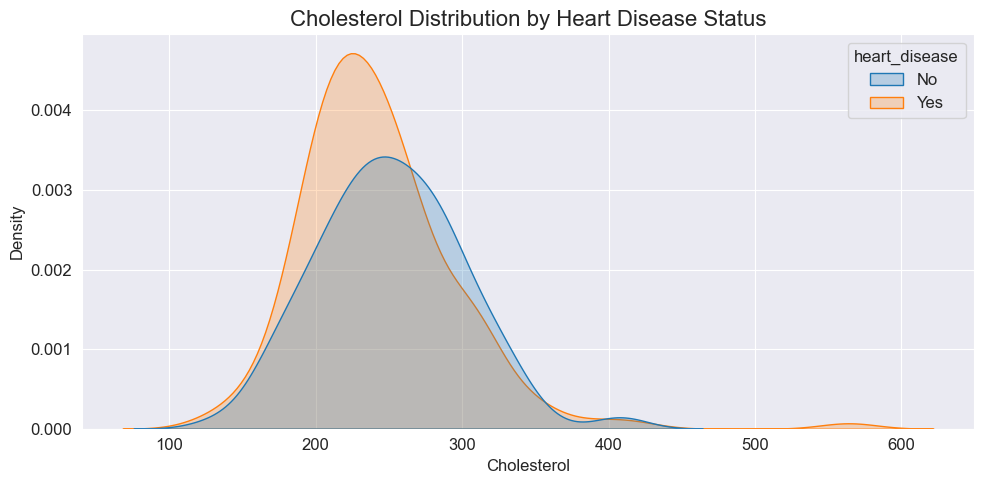

In [32]:
plt.figure(figsize=(10, 5))
sns.kdeplot(x='cholesterol', hue='heart_disease', data=heart_df, fill=True)
plt.title('Cholesterol Distribution by Heart Disease Status')
plt.xlabel('Cholesterol')
plt.tight_layout()

#### Insights from graph

- `Individuals without Heart Disease`: The density peak is around 250 mg/dL, suggesting that a substantial number of individuals without heart disease have cholesterol levels around this value.
- `Individuals with Heart Disease`: The density peak is also around 200 mg/dL, but the distribution is slightly more spread out compared to those without heart disease, indicating a broader range of cholesterol levels among heart disease patients.

In [33]:
heart_df.columns

Index(['age', 'sex', 'chest_pain', 'resting_bp', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heartrate',
       'exercise_induced_angina', 'oldpeak', 'slope', 'num_vessels_colored',
       'thalassemia', 'heart_disease'],
      dtype='object')

### Max Heartrate vs Heart Disease

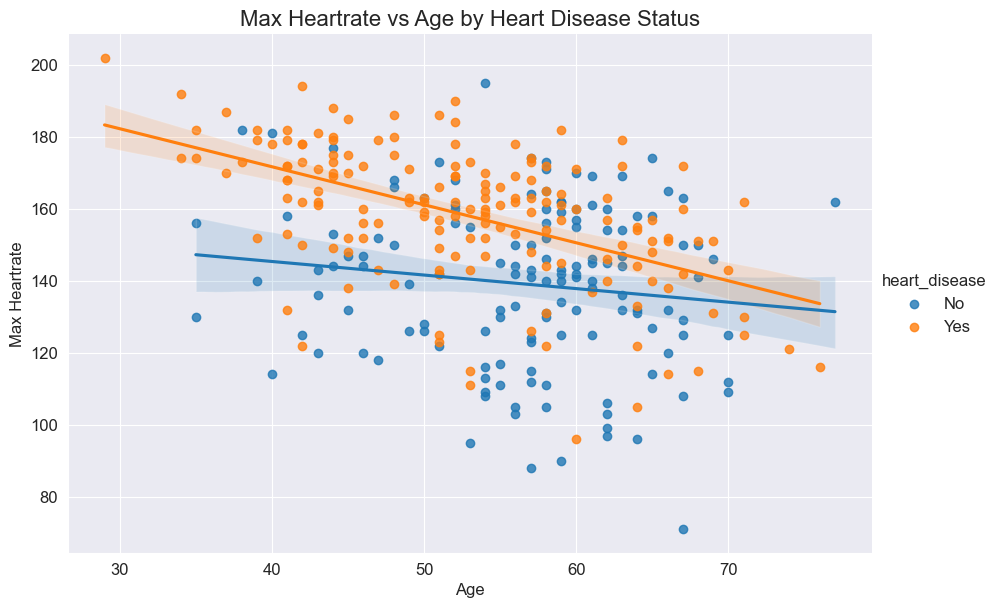

In [34]:
# Scatter plot with Regression line
sns.lmplot(y='max_heartrate', x='age', hue='heart_disease', data=heart_df, height=6, aspect=1.5)
plt.title('Max Heartrate vs Age by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Max Heartrate');

#### Insights from the Scatter plot graph

1. **Negative Correlation**
    - There is a clear negative correlation between age and maximum heart rate for both groups (with and without heart disease). As age increases, the maximum heart rate tends to decrease. This trend is expected as the cardiovascular system generally becomes less efficient with age.
<br>
2. **Impact of Heart Disease**
   - Individuals with heart disease tend to have a higher maximum heart rate compared to those without heart disease across most ages. This might seem counterintuitive, but it could be due to compensatory mechanisms in the heart or differences in physical activity levels among those with heart disease.

### Fasting Blood Sugar vs Heart Disease

In [35]:
fbs_hd_dist = pd.crosstab(heart_df.fasting_blood_sugar, heart_df.heart_disease)
fbs_hd_dist

heart_disease,No,Yes
fasting_blood_sugar,,
Abnormal,22,23
Normal,116,141


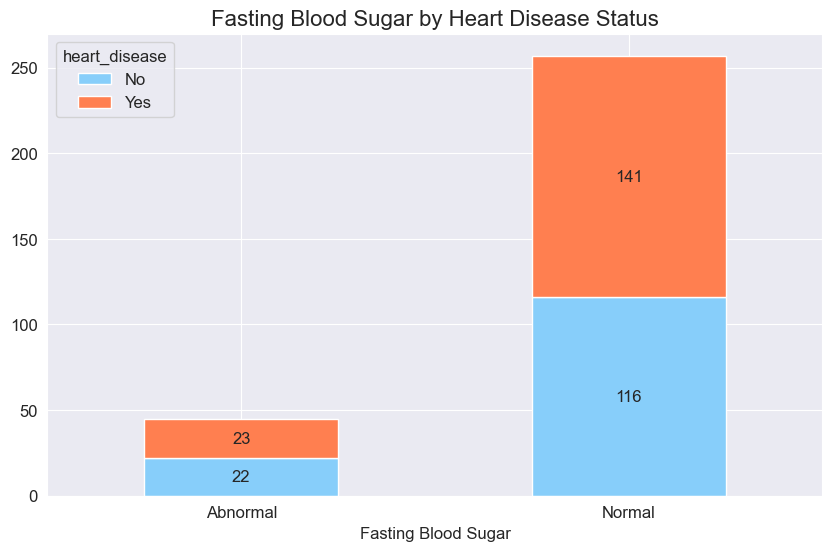

In [36]:
fig,ax = plt.subplots(figsize=(10, 6))
fbs_hd_dist.plot(kind='bar', stacked=True, color=colors, ax=ax)
plt.title('Fasting Blood Sugar by Heart Disease Status')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container, label_type='center')

### Thalassemia vs Heart Disease

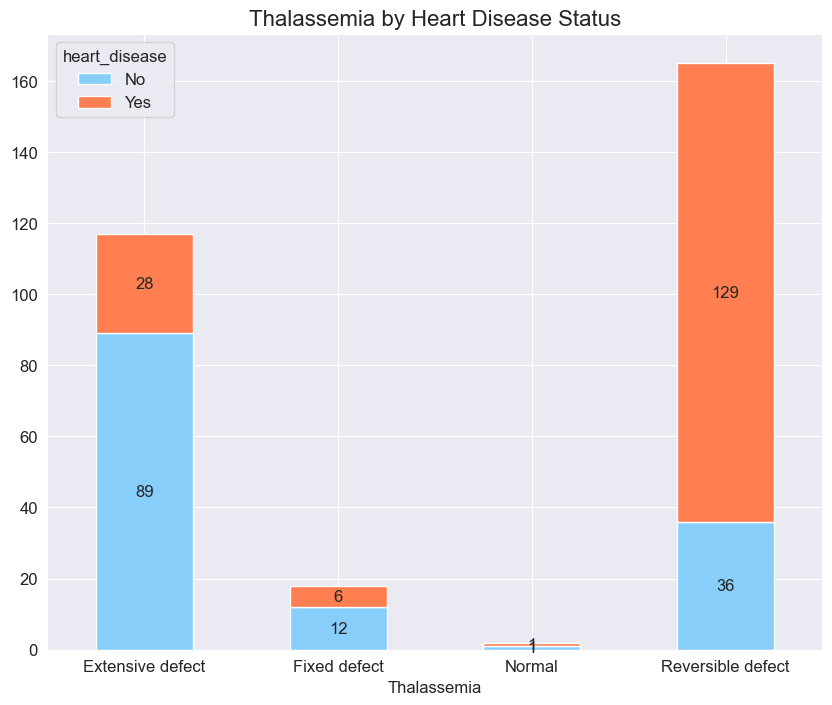

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
pd.crosstab(heart_df.thalassemia, heart_df.heart_disease).plot(kind='bar', stacked=True, color=colors, ax=ax)
plt.title('Thalassemia by Heart Disease Status')
plt.xlabel('Thalassemia')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container, label_type='center');

#### Insights 
- The "Extensive defect" and "Fixed defect" categories have more individuals without heart disease.
- The "Reversible defect" category has a much higher number of individuals with heart disease.
- The "Normal" category is very rare and does not show heart disease in this dataset.

In [38]:
heart_df.dtypes

age                          int64
sex                         object
chest_pain                  object
resting_bp                   int64
cholesterol                  int64
fasting_blood_sugar         object
resting_ecg                 object
max_heartrate                int64
exercise_induced_angina     object
oldpeak                    float64
slope                       object
num_vessels_colored          int64
thalassemia                 object
heart_disease               object
dtype: object

### Max Heart rate vs Slope

In [39]:
slope_hr = round(heart_df.groupby(['slope', 'heart_disease'])['max_heartrate'].mean().unstack(), 2)
slope_hr

heart_disease,No,Yes
slope,,
Downsloping,155.11,162.24
Flat,133.48,150.08
Unsloping,135.00,158.11


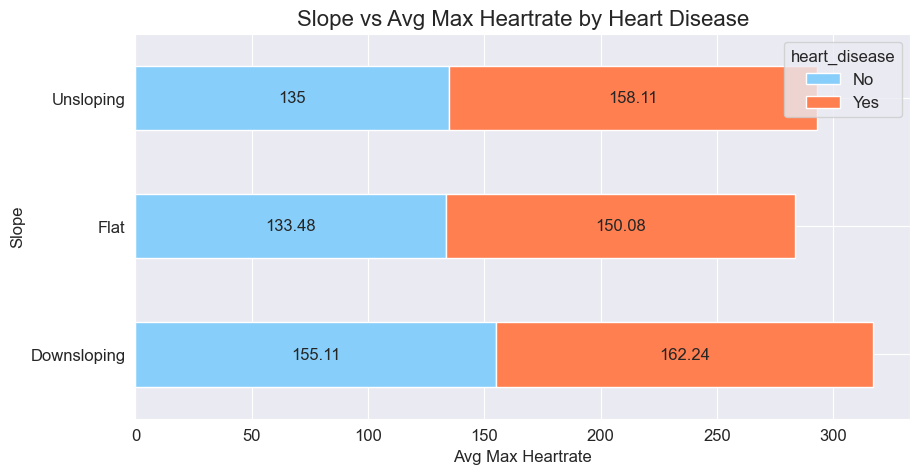

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
slope_hr.plot(kind='barh', stacked=True, color=colors, ax=ax)
plt.title('Slope vs Avg Max Heartrate by Heart Disease')
plt.xlabel('Avg Max Heartrate')
plt.ylabel('Slope')

for container in ax.containers:
    ax.bar_label(container, label_type='center')

#### Insights

- The individuals with and without heart disease in a 'Downsloping' slope have higher Average Maximum Heartrate.
- The average maximum heart rate on the 'Unsloping' slope is higher than on the 'Flat' slope for individuals with and without heart disease.

In [41]:
heart_df.columns

Index(['age', 'sex', 'chest_pain', 'resting_bp', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heartrate',
       'exercise_induced_angina', 'oldpeak', 'slope', 'num_vessels_colored',
       'thalassemia', 'heart_disease'],
      dtype='object')